In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import pandas as pd
import operator

# 特征字典，后面用到了好多次，干脆当全局变量了
featureDic = {
    '色泽': ['浅白', '青绿', '乌黑'],
    '根蒂': ['硬挺', '蜷缩', '稍蜷'],
    '敲声': ['沉闷', '浊响', '清脆'],
    '纹理': ['清晰', '模糊', '稍糊'],
    '脐部': ['凹陷', '平坦', '稍凹'],
    '触感': ['硬滑', '软粘']}


def getDataSet():
    """
    get watermelon data set 3.0 alpha.
    :return: 编码好的数据集以及特征的字典。
    """
    dataSet = [
        ['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.697, 0.460, 1],
        ['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 0.774, 0.376, 1],
        ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.634, 0.264, 1],
        ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 0.608, 0.318, 1],
        ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.556, 0.215, 1],
        ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0.403, 0.237, 1],
        ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘', 0.481, 0.149, 1],
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑', 0.437, 0.211, 1],
        ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑', 0.666, 0.091, 0],
        ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘', 0.243, 0.267, 0],
        ['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑', 0.245, 0.057, 0],
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘', 0.343, 0.099, 0],
        ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑', 0.639, 0.161, 0],
        ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑', 0.657, 0.198, 0],
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0.360, 0.370, 0],
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑', 0.593, 0.042, 0],
        ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑', 0.719, 0.103, 0]
    ]

    features = ['色泽', '根蒂', '敲声', '纹理', '脐部', '触感', '密度', '含糖量']
    # features = ['color', 'root', 'knocks', 'texture', 'navel', 'touch', 'density', 'sugar']

    # #得到特征值字典，本来用这个生成的特征字典，还是直接当全局变量方便
    # featureDic = {}
    # for i in range(len(features)):
    #     featureList = [example[i] for example in dataSet]
    #     uniqueFeature = list(set(featureList))
    #     featureDic[features[i]] = uniqueFeature

    # 每种特征的属性个数
    numList = []  # [3, 3, 3, 3, 3, 2]
    for i in range(len(features) - 2):
        numList.append(len(featureDic[features[i]]))

    dataSet = np.array(dataSet)
    return dataSet[:, :-1], dataSet[:, -1], features


# data, classLabel, feature = getDataSet()
# print(data)
# print(classLabel)
# print(feature)


def newData():
    """
    利用pandas将分类变量转化为数值变量。将分类变量进行one-hot编码。
    :return: 变量全为数值的变量，以及新的特征标签。
    """
    dataSet, classLabel, features = getDataSet()
    df = pd.DataFrame(dataSet)
    df.columns = features
    # 类别变量转化为数字变量
    # features = ['色泽', '根蒂', '敲声', '纹理', '脐部', '触感', '密度', '含糖量']
    # features = ['color', 'root', 'knocks', 'texture', 'navel', 'touch', 'density', 'sugar']
    # 色泽
    color = pd.get_dummies(df.色泽, prefix="色泽")
    # 根蒂
    root = pd.get_dummies(df.根蒂, prefix="根蒂")
    # 敲声
    knocks = pd.get_dummies(df.敲声, prefix="敲声")
    # 纹理
    texture = pd.get_dummies(df.纹理, prefix="纹理")
    # 脐部
    navel = pd.get_dummies(df.脐部, prefix="脐部")
    # 触感
    touch = pd.get_dummies(df.触感, prefix="触感")
    # 密度和含糖量
    densityAndsugar = pd.DataFrame()
    densityAndsugar["密度"] = df.密度
    densityAndsugar["含糖量"] = df.含糖量
    # 融合
    newData = pd.concat([color, root, knocks, texture, navel, touch, densityAndsugar], axis=1)
    # print("newData", newData)
    newFeatures = list(newData.columns)
    newData = np.asarray(newData, dtype="float64")
    classLabel = np.asarray(classLabel, dtype="int").reshape(-1, 1)

    # 新的特征数据和类融合
    newDataSet = np.concatenate((newData, classLabel), axis=1)
    # # 在第一列添加1
    # newDataSet = np.insert(newDataSet, 0,
    #                        np.ones(dataSet.shape[0]),
    #                        axis=1)

    return newDataSet, newFeatures


# Sigmoid 函数
def sigmoid(Z):
    return 1.0 / (1 + np.exp(-Z))


# 神经网络累计BP
def NNetworkBP(dataSet, eta, thresh):
    """
    :param dataSet: 数据集. m x n
    :param eta: 学习率
    :return:
    """
    errHistory = []     # 记录每轮迭代的均方误差
    y = dataSet[:, -1].reshape(-1, 1)
    x = dataSet[:, :-1]
    m, n = x.shape
    # 隐层参数
    v = np.random.randn(n, n + 1)
    # 输出层参数
    w = np.random.randn(n + 1, 1)
    # 隐层阈值
    gamma = np.random.randn(1, n + 1)
    # 输出值
    theta = np.random.random(1)

    err = errOfMeanSqur(dataSet, v, gamma, w, theta)
    while err > thresh:
        b = sigmoid(np.dot(x, v) - gamma)  # m x (n+1)
        beta = np.dot(b, w)     # m x 1
        # 预测值
        yHat = sigmoid(beta - theta)    # m x 1
        # 输出层神经元梯度项
        g = yHat * (1 - yHat) * (y - yHat)  # m x 1
        # 隐层神经元梯度向
        e = b * (1 - b) * np.dot(g, w.T)    # m x (n+1)
        # 更新w, v, theta, gamma
        w += eta * np.dot(b.T, g)
        v += eta * np.dot(x.T, e)
        theta -= eta * g.sum()
        gamma -= eta * e.sum(axis=0)

        err = errOfMeanSqur(dataSet, v, gamma, w, theta)
        errHistory.append(err)

    return v, gamma, w, theta, errHistory


# 神经网络累计BP
def NNetworkABP(dataSet, eta, thresh):
    """
    :param dataSet: 数据集. m x n
    :param eta: 学习率
    :return:
    """
    errHistory = []     # 记录每轮迭代的均方误差
    y = dataSet[:, -1].reshape(-1, 1)
    x = dataSet[:, :-1]
    m, n = x.shape
    # 隐层参数
    v = np.random.randn(n, n + 1)
    # 输出层参数
    w = np.random.randn(n + 1, 1)
    # 隐层阈值
    gamma = np.random.randn(1, n + 1)
    # 输出值
    theta = np.random.random(1)
    epoch = 0

    err = errOfMeanSqur(dataSet, v, gamma, w, theta)
    while err > thresh:
        for i in range(m):
            b = sigmoid(np.dot(x[i], v) - gamma)  # 1 x (n+1)
            beta = np.dot(b, w)[0]     # 1
            # 预测值
            yHat = sigmoid(beta - theta)  # 1
            # 输出层神经元梯度项
            g = yHat * (1 - yHat) * (y[i] - yHat)  # 1
            print("g = ", g)
            # 隐层神经元梯度向
            e = b * (1 - b) * g * w.T.sum()   # 1 x (n+1)
            # 更新w, v, theta, gamma
            w += eta * b.T * g
            v += eta * np.dot(x[i].reshape(n, -1), e)
            theta -= eta * g
            gamma -= eta * e
            epoch += 1
            err = errOfMeanSqur(dataSet, v, gamma, w, theta)
            errHistory.append(err)

    return v, gamma, w, theta, errHistory


def classify(data, v, gamma, w, theta):
    b = sigmoid(np.dot(data, v) - gamma)
    beta = np.dot(b, w)
    yHat = sigmoid(beta - theta)
    return yHat[0][0]


def errOfMeanSqur(dataSet, v, gamma, w, theta):
    x = dataSet[:, :-1]
    y = dataSet[:, -1]
    num = x.shape[0]
    err = 0.0
    for i in range(num):
        yPre = classify(dataSet[i][:-1], v, gamma, w, theta)
        err += ((y[i] - yPre) ** 2) / 2.0

    return err / float(num)



def main():
    # # test NNetwork
    dataSet, _ = newData()
    print(dataSet)
    v1, gamma1, w1, theta1, errHistory1 = NNetworkBP(dataSet, 0.1, 0.001)
    # 画图
    plt.plot(np.arange(len(errHistory1)), errHistory1)
    plt.show()
    # test NNetworkABP(dataSet, eta, thresh)
    v2, gamma2, w2, theta2, errHistory2 = NNetworkABP(dataSet, 0.1, 0.001)
    plt.plot(np.arange(len(errHistory2)), errHistory2)
    plt.show()
    

if __name__ == '__main__':
    main()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#西瓜数据集 每一列为一条数据
features=np.array([
    [1,2,2,1,0,1,2,2,2,1,0,0,1,0,2,0,1],
    [2,2,2,2,2,1,1,1,1,0,0,2,1,1,1,2,2],
    [1,0,1,0,1,1,1,1,0,2,2,1,1,0,1,1,0],
    [0,0,0,0,0,0,1,0,1,0,2,2,1,1,0,2,1],
    [2,2,2,2,2,1,1,1,1,0,0,0,2,2,1,0,1],
    [1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,1,1],
    [0.697,0.774,0.634,0.608,0.556,0.403,0.481,0.437,0.666,0.243,0.245,0.343,0.639,0.657,0.360,0.593,0.719],
    [0.460,0.376,0.264,0.318,0.215,0.237,0.149,0.211,0.091,0.267,0.057,0.099,0.161,0.198,0.370,0.042,0.103]
])
labels=np.array([
    [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]
])

def sigmoid(X):
    return 1./(1+np.exp(-X))
class Net():
    def __init__(self,num_input=8,num_hidden=10,num_output=1):
        #隐含层和输出层的权重和偏置
        self.W1=np.random.randn(num_hidden,num_input)
        self.b1=np.zeros(num_hidden).reshape(-1,1)
        self.W2=np.random.randn(num_output,num_hidden)
        self.b2=np.zeros(num_output).reshape(-1,1)
        #隐含层和输出层的输出
        self.o1=np.zeros(num_hidden).reshape(-1,1)
        self.o2=np.zeros(num_output).reshape(-1,1)
        #梯度存储变量
        self.do2=np.zeros(self.o2.shape)
        self.dW2=np.zeros(self.W2.shape)
        self.db2=np.zeros(self.b2.shape)
        self.do1=np.zeros(self.o1.shape)
        self.dW1=np.zeros(self.W1.shape)
        self.db1=np.zeros(self.b1.shape)
    def forward(self,X):#前向传播
        if X.shape[0] != self.W1.shape[1]:
            print("输入数据格式错误！")
            return
        self.input=X
        #使用sigmoid函数为激活函数
        self.o1=sigmoid(np.matmul(self.W1,self.input)+self.b1)
        self.o2=sigmoid(np.matmul(self.W2,self.o1)+self.b2)
        return self.o2
    def standard_BP(self,label,lr=0.2):#标准BP 使用均方误差为损失函数
        #求梯度
        self.do2=self.o2-label
        self.dW2=np.matmul(self.do2*self.o2*(1-self.o2),self.o1.reshape(1,-1))
        self.db2=self.do2*self.o2*(1-self.o2)
        self.do1=np.matmul(self.W2.transpose(),self.do2*self.o2*(1-self.o2))
        self.dW1=np.matmul(self.do1*self.o1*(1-self.o1),self.input.reshape(1,-1))
        self.db1=self.do1*self.o1*(1-self.o1)
        #更新参数
        self.W2-=self.dW2*lr
        self.b2-=self.db2*lr
        self.W1-=self.dW1*lr
        self.b1-=self.db1*lr
    def accumulate_BP(self,labels,lr=0.2):#累积BP 使用均方误差为损失函数
        num=labels.shape[1]#样本数量
        #求梯度
        self.do2=(self.o2-labels)/num
        self.dW2=np.matmul(self.do2*self.o2*(1-self.o2),self.o1.transpose())
        self.db2=(self.do2*self.o2*(1-self.o2)).sum(axis=1).reshape(-1,1)
        self.do1=np.matmul(self.W2.transpose(),self.do2*self.o2*(1-self.o2))
        self.dW1=np.matmul(self.do1*self.o1*(1-self.o1),self.input.transpose())
        self.db1=(self.do1*self.o1*(1-self.o1)).sum(axis=1).reshape(-1,1)
        #更新参数
        self.W2-=self.dW2*lr
        self.b2-=self.db2*lr
        self.W1-=self.dW1*lr
        self.b1-=self.db1*lr
        
def train_standard_BP(features,labels,lr):
    net=Net()
    epoch=0
    loss=1
    all_loss=[]
    while loss>0.01:#停止条件
        for i in range(features.shape[1]):
            X=features[:,i]
            Y=labels[0,i]
            net.forward(X.reshape(-1,1))
            net.standard_BP(Y,lr)
        output=net.forward(features)
        loss=0.5*((output-labels)**2).sum()
        epoch+=1
        all_loss.append(loss)
    print("标准BP","学习率：",lr,"\n终止epoch：",epoch,"loss: ",loss)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.plot(all_loss)
    plt.show()
    
def train_accumulate_BP(features,labels,lr=0.2):
    net=Net()
    epoch=0
    loss=1
    all_loss=[]
    while loss>0.01:#停止条件
        output=net.forward(features)
        net.accumulate_BP(labels,lr)
        loss=0.5*((output-labels)**2).sum()/labels.shape[1]
        epoch+=1
        all_loss.append(loss)
    print("累积BP","学习率：",lr,"\n终止epoch：",epoch,"loss: ",loss)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.plot(all_loss)
    plt.show()

train_standard_BP(features,labels,0.1)
train_accumulate_BP(features,labels,0.1)


iteration 1, err = 27.598255718523475
iteration 2, err = 26.882820717781332
iteration 3, err = 0.5765954775101492
iteration 4, err = 0.31209806831926507
iteration 5, err = 0.14261484328489593
iteration 6, err = 0.06396468302402102
iteration 7, err = 0.06289612191353328
iteration 8, err = 0.08609138712214127
iteration 9, err = 0.06098221958061106
iteration 10, err = 0.08111682404396105
iteration 11, err = 0.1045536770536512
iteration 12, err = 0.058329594056829775
iteration 13, err = 0.058351867925893586
iteration 14, err = 0.06452808102077698
iteration 15, err = 0.0858100066849134
iteration 16, err = 0.10173604336605463
iteration 17, err = 0.055300909655681026
iteration 18, err = 0.05648956581624648
iteration 19, err = 0.07641672746006256
iteration 20, err = 0.06828970588034809
iteration 21, err = 0.08557730047657695
iteration 22, err = 0.09511843001711956
iteration 23, err = 0.0996324166781515
iteration 24, err = 0.052056315943490805
iteration 25, err = 0.054221887160681666
iteration 

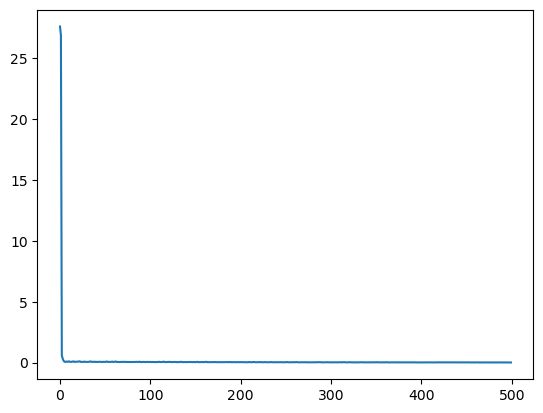

data = [0 0], label = 0, pre = [[0.05274771]]
data = [1 0], label = 1, pre = [[0.81318256]]
data = [0 1], label = 1, pre = [[0.79768924]]
data = [0 0], label = 0, pre = [[0.05274771]]
data = [1 1], label = 0, pre = [[0.06894623]]
data = [0 1], label = 1, pre = [[0.79768924]]
data = [1 1], label = 0, pre = [[0.06894623]]
data = [0 0], label = 0, pre = [[0.05274771]]
data = [0 1], label = 1, pre = [[0.79768924]]
data = [0 1], label = 1, pre = [[0.79768924]]
data = [0 1], label = 1, pre = [[0.79768924]]
data = [0 0], label = 0, pre = [[0.05274771]]
data = [1 1], label = 0, pre = [[0.06894623]]
data = [0 1], label = 1, pre = [[0.79768924]]
data = [1 0], label = 1, pre = [[0.81318256]]
data = [1 0], label = 1, pre = [[0.81318256]]
data = [0 0], label = 0, pre = [[0.05274771]]
data = [1 1], label = 0, pre = [[0.06894623]]
data = [0 0], label = 0, pre = [[0.05274771]]
data = [1 1], label = 0, pre = [[0.06894623]]
data = [0 0], label = 0, pre = [[0.05274771]]
data = [0 0], label = 0, pre = [[0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def getDataSet():
    """
    得到异或的训练集
    :return:
    """
    dataSet = [
        [0, 0, 0],
        [0, 1, 1],
        [1, 1, 0],
        [1, 0, 1]
    ]
    return np.array(dataSet)


def RBFNN(dataSet, eta, thresh):
    """
    训练RBF网络
    :param dataSet: 数据集
    :param eta:     学习率
    :param thresh:  错误率容忍度
    :return: w,     隐层神经元对应的权重
             c,     隐层神经元对应的中心
            beta,   高斯径向基函数里的参数
          errHistory  训练的历史错误率
    """
    errHistory = []  # 记录每轮迭代的均方误差
    y = dataSet[:, -1]
    x = dataSet[:, :-1]
    m, n = x.shape

    # 隐层神经元数
    t = 10
    # 初始化c
    c = np.random.rand(t, n)
    # 初始化beta
    beta = np.random.randn(1, t)
    # 初始化w
    w = np.random.rand(1, t)
    err = errOfMeanSqur(dataSet, w, c, beta)
    while err > thresh:
        for i in range(m):
            trainX = np.tile(x[i], (t, 1))
            dist = ((trainX - c) ** 2).sum(axis=1).reshape(1, -1)  # 1 x 8
            rho = np.exp(-beta * dist)  # 1 x 8
            phi = np.dot(w, rho.T)

            # 计算梯度
            dBeta = -w * (phi - y[i]) * rho * dist
            dw = (phi - y[i]) * rho

            # 更新参数
            beta -= eta * dBeta
            w -= eta * dw

            # 计算新的错误率
            err = errOfMeanSqur(dataSet, w, c, beta)
            errHistory.append(err)
            print(f"iteration {len(errHistory)}, err = {err}")

    return w, c, beta, errHistory


def classify(data, w, c, beta):
    """
    给定参数分类
    :param data:
    :param w:
    :param c:
    :param beta:
    :return:
    """
    dataArr = np.tile(data, (c.shape[0], 1))
    dist = ((dataArr - c) ** 2).sum(axis=1)
    rho = np.exp(-beta * dist).reshape(-1, 1)
    return np.dot(w, rho)


def errOfMeanSqur(dataSet, w, c, beta):
    """
    计算平方误差
    :param dataSet:
    :param w:
    :param c:
    :param beta:
    :return:
    """
    x = dataSet[:, :-1]
    y = dataSet[:, -1]
    num = x.shape[0]
    err = 0.0
    for i in range(num):
        yPre = classify(dataSet[i][:-1],  w, c, beta)
        err += ((y[i] - yPre) ** 2) / 2.0

    return (err / float(num))[0][0]


def main():
    # test RBFNN(dataSet, eta, thresh)
    X = np.random.randint(0,2,(100,2))
    y = np.logical_xor(X[:,0],X[:,1]).astype(int)
    dataSet = np.hstack((X,y.reshape(-1,1)))
    # dataSet = getDataSet()
    w, c, beta, errHistory1 = RBFNN(dataSet, 0.1, 0.01)
    plt.plot(np.arange(len(errHistory1)), errHistory1)
    plt.show()

    # 测试抑或
    for data in dataSet:
        pre = classify(data[:-1], w, c, beta)
        print(f"data = {data[:-1]}, label = {data[-1]}, pre = {pre}")


if __name__ == '__main__':
    main()



17 2
Epoch 1
quantization_error= 0.4345
Epoch 2
quantization_error= 0.3283
Epoch 3
quantization_error= 0.2729
Epoch 4
quantization_error= 0.2356
Epoch 5
quantization_error= 0.2110


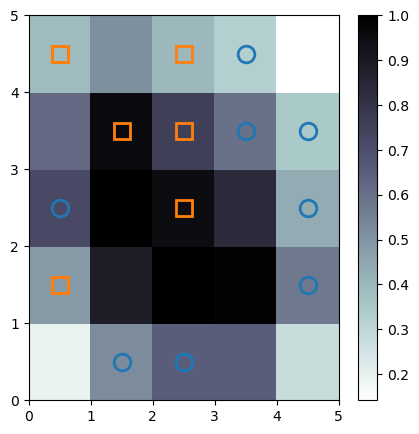

3.033664477831346e-43
2
2
3
2
3
2
3
1
3
0
0
0
3
3
2
3
3


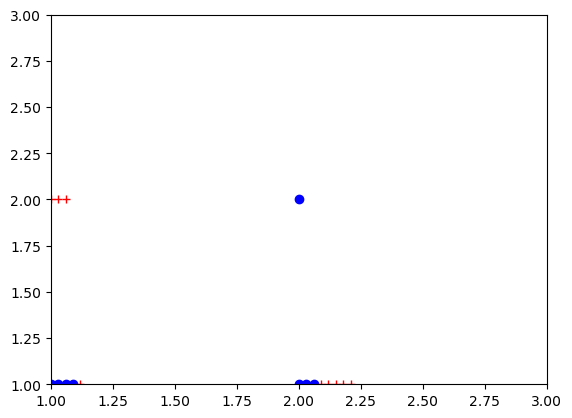

In [23]:
"""
Author: Victoria
Created on 2017.9.19 21:00
"""
import numpy as np
import matplotlib.pyplot as plt
import random

class SOMNet():
    def __init__(self, input_dims, output_nums, sigma0, rta0, tau1, tau2, iterations):
        self.input_dims = input_dims
        self.output_nums = output_nums
        self.sigma0 = sigma0
        self.eta0 = eta0
        self.tau1 = tau1        
        self.tau2 = tau2
        self.iterations = iterations
        self.weights = np.random.rand(output_nums, input_dims)

    def distance(self, w, x):
        """
        Compute distance between array w and vector v2.
        Input:
            w: np.array with shape [m, d]
            x: np.array with shape [1, d]
        Return:
            dist_square: np.array with shape [m, 1] when w is array or float when w is vector
        """
        m = w.shape[0]
        if m==1:
            dist_square = np.sum((w-x)**2)
        else:
            dist_square = np.sum((w-x)**2, axis=1, keepdims=True)
        return dist_square

    def bmu(self, x):
        """
        Compute the best match unit(BMU) given input vector x.
        Input:
            x: np.array with shape [1, d].
        Return:
            index: the index of BMU
        """
        dist_square = self.distance(self.weights, x)
        index = np.argmax(dist_square)
        return index

    def radius(self, iter):
        """
        Computer neighborhood radius for current BMU.
        Input:
            iter: the current iteration.
        """
        sigma = self.sigma0 * np.exp(-iter / self.tau1)
        return sigma

    def update(self, x, iter, sigma):
        """
        Update weight vector for all output unit each iteration.
        Input:
            x: np.array with shape [1, d]. The current input vector.
            iter: int, the current iteration.
            sigma: float, the current neighborhood function.
        """
        eta = self.eta0 * np.exp(-iter / self.tau2)
        neighbor_function = np.exp( - self.distance(self.weights, x) / (2*sigma*sigma) ) 
        self.weights = self.weights + eta * neighbor_function * (x - self.weights)

    def train(self, train_X):
        """
        Learning the weight vectors of all output units.
        Input:
            train_X: list with lenght n and element is np.array with shape [1, d]. Training instances.       
        """
        n = len(train_X)
        for iter in range(self.iterations):
            #step 2: choose instance from train set randomly
            x = train_X[random.randint(0, n-1)]

            #step 3: compute BMU for current instance
            bmu = self.bmu(x)

            #step 4: computer neighborhood radius
            sigma = self.radius(iter)

            #step5: update weight vectors for all output unit
            self.update(x, iter, sigma)
        print(sigma)

    def eval(self, x):
        """
        Computer index of BMU given input vector.
        """
        return self.bmu(x)

if __name__=="__main__":

    #prepare train data
    train_X = datas
    train_y = labs
    #training SOM network
    output_nums = 4
    sigma0 = 3
    eta0 = 0.1
    tau1 = 1
    tau2 = 1
    iterations = 100                         
    som_net = SOMNet(2, output_nums, sigma0, eta0, tau1, tau2, iterations)
    som_net.train(train_X)

    #plot data in 2 dimension space
    left_top_count = 0
    left_bottom_count = 0
    right_top_count = 0
    right_bottom_count = 0
    for i in range(len(train_X)):
        bmu = som_net.eval(train_X[i])
        if train_y[i] == 1:
            style = "bo"
        else:
            style = "r+"
        print(bmu)
        if bmu == 0:
            plt.plot([1+left_top_count*0.03], [2], style)
            left_top_count += 1
        elif bmu == 1:
            plt.plot([2+right_top_count*0.03], [2], style)
            right_top_count += 1            
        elif bmu == 2:
            plt.plot([1+left_bottom_count*0.03], [1], style)
            left_bottom_count += 1           
        else:
            plt.plot([2+right_bottom_count*0.03], [1], style)
            right_bottom_count += 1

    plt.xlim([1, 3])
    plt.ylim([1, 3])
    plt.show()

In [ ]:
from torch import nn
 
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 25 × 26 × 26
        self.layer1 = nn.Sequential(
            # 输入通道为1，输出通道为25，卷积核大小为3
            nn.Conv2d(1, 25, kernel_size=3),
            # 二维批量归一化
            nn.BatchNorm2d(25),
            # 引入非线性
            nn.ReLU(inplace=True)
        )

        #25 × 13 × 13
        self.layer2 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
 
        self.layer3 = nn.Sequential(
            nn.Conv2d(25, 50, kernel_size=3),
            nn.BatchNorm2d(50),
            nn.ReLU(inplace=True)
        )
 
        self.layer4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
 
        self.fc = nn.Sequential(
            nn.Linear(50 * 5 * 5, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 10)
        )
 
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

#-------------------------------------超参数定义-------------------------------------
batch_size = 64 #一个batch的size
learning_rate = 0.02
num_epoches = 3 #总样本的迭代次数

#-------------------------------------数据预处理方法--------------------------------------
# transforms.ToTensor()将图片转换成PyTorch中处理的对象Tensor,并且进行标准化（数据在0~1之间）
# transforms.Normalize()做归一化。它进行了减均值，再除以标准差。两个参数分别是均值和标准差
# transforms.Compose()函数则是将各种预处理的操作组合到了一起
data_tf = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])

#-------------------------------------数据集的下载器--------------------------------------
#训练和测试集预处理
train_dataset = datasets.MNIST(root='./data', train=True, transform=data_tf, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=data_tf)
#加载数据集
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#-------------------------------------选择模型--------------------------------------
'''
1. 输入28*28(因为输入的图像像素为28*28)
2. 隐藏层分别为300和100
3. 输出层为10，因为识别的数字为0~9
'''
#下列3个模型可以任选其中之一
model = CNN() 
# model = net.Activation_Net(28 * 28, 300, 100, 10)
# model = net.Batch_Net(28 * 28, 300, 100, 10)
if torch.cuda.is_available():
    model = model.cuda()

#-------------------------------------定义损失函数和优化器--------------------------------------
#交叉熵和SGD优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

#-------------------------------------开始训练-------------------------------------
print('Start Training!')
iter = 0 #迭代次数
for epoch in range(num_epoches):
    for data in train_loader:
        img, label = data
        #img = img.view(img.size(0), -1)
        if torch.cuda.is_available():
            img = img.cuda()
            label = label.cuda()
        else:
            img = img
            label = label
        out = model(img)
        loss = criterion(out, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        iter+=1
        #每迭代50次打印一次
        if iter%50 == 0:
            print('epoch: {}, iter:{}, loss: {:.4}'.format(epoch, iter, loss.data.item()))

#-------------------------------------模型评估-------------------------------------
print('Start eval!')
model.eval()
eval_loss = 0
eval_acc = 0
for data in test_loader:
    img, label = data
    #img = img.view(img.size(0), -1)
    if torch.cuda.is_available():
        img = img.cuda()
        label = label.cuda()

    out = model(img)
    loss = criterion(out, label)
    eval_loss += loss.data.item()*label.size(0)
    _, pred = torch.max(out, 1)
    num_correct = (pred == label).sum()
    eval_acc += num_correct.item()

print('Test Loss: {:.6f}, Acc: {:.6f}'.format(eval_loss / (len(test_dataset)), eval_acc / (len(test_dataset))))


100.0%
100.0%
100.0%
100.0%


Start Training!
epoch: 0, iter:50, loss: 1.352
epoch: 0, iter:100, loss: 0.6122
epoch: 0, iter:150, loss: 0.2786
epoch: 0, iter:200, loss: 0.171
epoch: 0, iter:250, loss: 0.1355
epoch: 0, iter:300, loss: 0.07819
epoch: 0, iter:350, loss: 0.1685
epoch: 0, iter:400, loss: 0.2389
epoch: 0, iter:450, loss: 0.12
epoch: 0, iter:500, loss: 0.1156
epoch: 0, iter:550, loss: 0.2204
epoch: 0, iter:600, loss: 0.06053
epoch: 0, iter:650, loss: 0.05902
epoch: 0, iter:700, loss: 0.05292
epoch: 0, iter:750, loss: 0.1626
epoch: 0, iter:800, loss: 0.03293
epoch: 0, iter:850, loss: 0.01562
epoch: 0, iter:900, loss: 0.1228
epoch: 1, iter:950, loss: 0.1266
epoch: 1, iter:1000, loss: 0.0984
epoch: 1, iter:1050, loss: 0.06906
epoch: 1, iter:1100, loss: 0.05163
epoch: 1, iter:1150, loss: 0.03628
epoch: 1, iter:1200, loss: 0.01078
epoch: 1, iter:1250, loss: 0.01973
epoch: 1, iter:1300, loss: 0.06717
epoch: 1, iter:1350, loss: 0.04497
epoch: 1, iter:1400, loss: 0.04103
epoch: 1, iter:1450, loss: 0.05704
epoch: 